<a href="https://colab.research.google.com/github/mdainur/kbtu-ml-book/blob/mlp-layers/mlp/layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layers of MLP

From mathematical point of view MLP is a smooth function $F$ which is constructed as a composition of some other functions

$$
F(\boldsymbol x) = (f_{L} \circ f_{L-1} \circ\ldots \circ f_2 \circ f_1)(\boldsymbol x),\quad
\boldsymbol x \in \mathbb R^{n_0}
$$

Each function

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \to \mathbb R^{n_\ell}
$$

is called a **layer**; it converts representation of $(\ell-1)$-th layer

$$
    \boldsymbol x_{\ell -1} \in \mathbb R^{n_{\ell - 1}}
$$

to the representation of $\ell$-th layer

$$
   \boldsymbol x_{\ell} \in \mathbb R^{n_{\ell}}.
$$

Thus, the **input layer** $\boldsymbol x_0 \in \mathbb R^{n_0}$ is converted to the **output layer** $\boldsymbol x_L \in \mathbb R^{n_L}$. All other layers $\boldsymbol x_\ell$, $1\leqslant \ell < L$, are called **hidden layers**. If an MLP has two or more hidden layers, it is called a deep neural network.

```{warning}
The terminology about layers is a bit ambiguous. Both functions $f_\ell$ and their outputs $\boldsymbol x_\ell = f(\boldsymbol x_{\ell - 1})$ are called $\ell$-th layer in different sources.
```



## Parameters of MLP

However, one important element is missing in this description of MLP: parameters! Each layer $f_\ell$ has a vector of parameters $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$ (sometimes empty). Hence, a layer should be defined as

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \times \mathbb R^{m_\ell} \to \mathbb R^{n_\ell}.
$$

The representation $\boldsymbol x_\ell$ is calculated from $\boldsymbol x_{\ell -1}$ by the formula

$$
\boldsymbol x_\ell = f_\ell(\boldsymbol x_{\ell - 1},\boldsymbol \theta_\ell)
$$

with some fixed $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$. The whole MLP $F$ depends on parameters of all layers:

$$
    F(\boldsymbol x, \boldsymbol \theta), \quad \boldsymbol \theta = (\boldsymbol \theta_1, \ldots, \boldsymbol \theta_L).
$$

All these parameters are trained simultaneously by the {ref}`backpropagation method <backprop>`.




## Linear layer

Edges between two consequetive layers denote **linear** (or **dense**) layer:

$$
    \boldsymbol x_\ell = f(\boldsymbol x_{\ell - 1}; \boldsymbol W, \boldsymbol b) = \boldsymbol {Wx}_{\ell - 1} + \boldsymbol b.
$$

The matrix $\boldsymbol W \in \mathbb R^{n_{\ell - 1}\times n_\ell}$ and vector $\boldsymbol b \in \mathbb R^{n_\ell}$ (bias) are parameters of the linear layer which defines the linear transformation from $\boldsymbol x_{\ell - 1}$ to $\boldsymbol x_{\ell}$.

**Q**. How many numeric parameters does such linear layer have?

```{admonition} Exercise
:class: important

Suppose that we apply one more dense layer:

$$
    \boldsymbol x_{\ell + 1} = \boldsymbol {W'x}_{\ell} + \boldsymbol{b'}
$$

Express $\boldsymbol x_{\ell + 1}$ as a function of $\boldsymbol x_{\ell - 1}$.```

In [ ]:
# @title
!pip install jupyterquiz
import json
from jupyterquiz import display_quiz
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question2.json")

<IPython.core.display.Javascript object>

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question1.json")

<IPython.core.display.Javascript object>

###Linear layer in PyTorch

In [ ]:
import torch

x = torch.randn(5)
x

tensor([-0.7568, -1.9770,  0.0768,  1.0487,  0.1292])

Weights:

In [ ]:
linear_layer = torch.nn.Linear(5, 6)
linear_layer.weight

Parameter containing:
tensor([[ 0.3036, -0.2879, -0.2582,  0.1427,  0.3310],
        [-0.2668, -0.0380,  0.3420, -0.3908, -0.2730],
        [-0.1875, -0.0583, -0.3547, -0.0448,  0.0005],
        [ 0.1935,  0.2351, -0.1493,  0.4044, -0.1120],
        [-0.0053, -0.2054, -0.0989, -0.2757,  0.0067],
        [-0.4358,  0.0479,  0.0208,  0.1095, -0.0214]], requires_grad=True)

Apply the linear transformation:

In [ ]:
linear_layer(x)

tensor([ 0.8889, -0.5036, -0.0657, -0.2537,  0.3832,  0.1138],
       grad_fn=<ViewBackward0>)

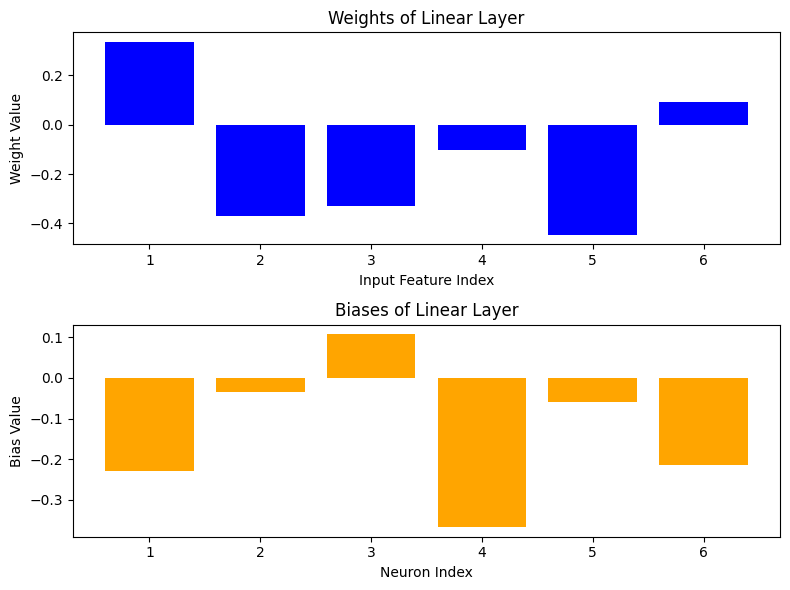

In [ ]:
# @title
import matplotlib.pyplot as plt

weights = linear_layer.weight.detach().numpy().T
biases = linear_layer.bias.detach().numpy()

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot weights
axs[0].bar(range(1, 7), weights[0], color='blue', label='Weights')
axs[0].set(title='Weights of Linear Layer', xlabel='Input Feature Index', ylabel='Weight Value')

# Plot biases
axs[1].bar(range(1, 7), biases, color='orange', label='Biases')
axs[1].set(title='Biases of Linear Layer', xlabel='Neuron Index', ylabel='Bias Value')

plt.tight_layout()
plt.show()

## Activation layer

The perceptron computes a single output from multiple real-valued inputs by forming a linear combination according to its input weights and then possibly putting the output through some nonlinear **activation function**. Mathematically this can be written as


$$
    y = \boldsymbol\psi \Big(\sum\limits_{i=1}^l W_i x_i + b \Big) = \boldsymbol\psi( W^\top \boldsymbol x + b).
$$

where, $\boldsymbol\psi$ is the activatiion function.

```{warning}
Note that different layers may have different activation functions.
```

The original Rosenblatt's perceptron used a Heaviside step function
$$
    \mathbb H(x) = \begin{cases}
        1,& \text{if }  x \geqslant 0, \\
        0,& \text{if }  x < 0.
    \end{cases}
$$
as the activation function $\boldsymbol\phi$. While the value of “1” triggers the activation function and “0” does not. If there exists more than one layer,a value of “1” will be configured to pass the output to the input of the next layer. Consequently, a “0” value is configured to be ignored and will not be passed to the next processor.


Nowadays, and especially in multilayer networks, the activation function is often chosen to be the logistic sigmoid
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

or the hyperbolic tangent

$$
\tanh(x)
$$

In [ ]:
# @title
import torch
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, clear_output, HTML

torch.manual_seed(1)

initial_x_value = 10
x_slider = widgets.FloatSlider(value=initial_x_value, min=-10, max=10, step=0.01, description='X Value:')

def plot_activation_functions(x_value, sigmoid, relu, tanh, softplus):
    x = torch.linspace(-initial_x_value, initial_x_value, 100)
    x_numpy = x.numpy()

    plt.figure(figsize=(8, 6))

    if sigmoid:
        plt.plot(x_numpy, torch.sigmoid(x).numpy(), label='Sigmoid')

    if relu:
        plt.plot(x_numpy, torch.relu(x).numpy(), label='ReLU')

    if tanh:
        plt.plot(x_numpy, torch.tanh(x).numpy(), label='Tanh')

    if softplus:
        plt.plot(x_numpy, torch.nn.functional.softplus(x).numpy(), label='Softplus')

    plt.title('Activation Functions')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)

    plt.xlim(-initial_x_value, initial_x_value)
    plt.ylim(-1, 2)

    plt.axvline(x_value, color='r', linestyle='--', label=f'X Value: {x_value:.2f}')
    plt.legend(loc='upper right')

    plt.show()

sigmoid_checkbox = widgets.Checkbox(value=True, description='Sigmoid', indent=False, layout={'marginRight': '50px'})
relu_checkbox = widgets.Checkbox(value=False, description='ReLU', indent=False, layout={'marginRight': '50px'})
tanh_checkbox = widgets.Checkbox(value=False, description='Tanh', indent=False, layout={'marginRight': '50px'})
softplus_checkbox = widgets.Checkbox(value=False, description='Softplus', indent=False, layout={'marginRight': '50px'})

interactive_plot = interactive(plot_activation_functions,
                               x_value=x_slider,
                               sigmoid=sigmoid_checkbox,
                               relu=relu_checkbox,
                               tanh=tanh_checkbox,
                               softplus=softplus_checkbox)

# Use HTML to hide the input cell
html_code = """
<style>
    .input_area {
        display: none;
    }
</style>
"""
display(HTML(html_code))

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=10.0, description='X Value:', max=10.0, min=-10.0, step=0.01), Checkbo…

These functions are used because they are mathematically convenient and are close to linear near origin while saturating rather quickly when getting away from the origin. This allows MLP networks to model well both strongly and mildly nonlinear mappings.



**Q**. How do the functions of the logistic sigmoid and hyperbolic tangent are related?

```{admonition} Exercise
:class: important

They are related by  
$$
\frac{\tanh(x)+1}2 = \frac{1}{1 + e^{-2x}}
$$```

We will discover activation functions in more detail in the {ref}`Activation functions <activations>`.

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question4.json")

<IPython.core.display.Javascript object>

### Sigmoid function in PyTorch

In [ ]:
import torch

torch.manual_seed(1)

x = torch.randn((3, 3, 3))
x

tensor([[[-1.5256, -0.7502, -0.6540],
         [-1.6095, -0.1002, -0.6092],
         [-0.9798, -1.6091, -0.7121]],

        [[ 0.3037, -0.7773, -0.0954],
         [ 0.1394, -1.5785, -0.3206],
         [-0.2993,  1.8793, -0.0721]],

        [[ 0.1578,  1.7163, -0.0561],
         [ 0.9107, -1.3924,  2.6891],
         [-0.1110,  0.2927, -0.1578]]])

Apply the sigmoid function and print the minimum and maximum values of the tensor:

In [ ]:
y = torch.sigmoid(x)

y.min(), y.max()

(tensor(0.1667), tensor(0.9364))

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question5.json")

<IPython.core.display.Javascript object>

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question3.json")

<IPython.core.display.Javascript object>

##From Linear to Nonlinear


The prediction formula for deep learning is linear itself. But each of its terms is also a linear hypothesis made up in their turn of terms that are also a linear hypothesis.  

$$
    y = \boldsymbol\psi_1(w_1 x_1 + w_2 x_2 + ... + w_n x_n + ... + w_l x_l + b).
$$

$$
    x_n = \boldsymbol\psi_2(q_1 p_1 + q_2 p_2 + ... + q_n p_n + ... + q_m p_m + c).
$$

$$
    p_n = \boldsymbol\psi_3(h_1 t_1 + h_2 t_2 + ... + h_n t_n + ... + h_s t_s + d).
$$

This linear embedding process of many linear hypotheses is quite powerful. This approach is capable of estimating highly nonlinear decision boundaries, even though the hypothesis at every level is considered a simple linear combination with some activation function. Moreover, a total number of weights that need to be calculated using a deep learning algorithm is far less than the highly nonlinear interaction terms from regression analysis.

So, we can overcome the limitations of linear models by integrating one or more hidden layers. The easiest way to do this is to stack many fully connected layers on top of one another. Each layer feeds into the layer above it until we generate outputs. We can think of the first $L-1$ layers as our representation and the final layer as our linear predictor. This architecture is commonly called a multilayer perceptron, often abbreviated as MLP.

##MLP working process



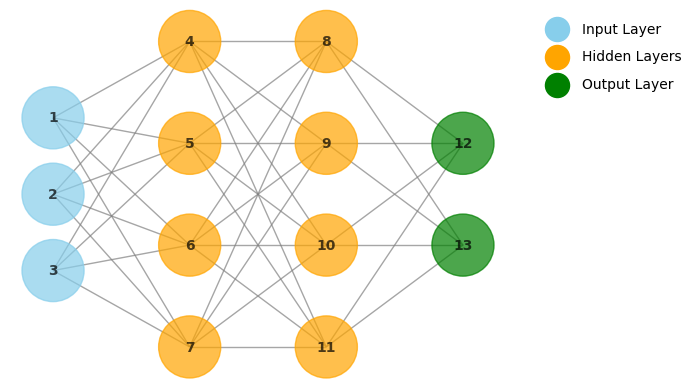

In [ ]:
# @title
import networkx as nx
import matplotlib.animation as animation
from itertools import cycle

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# Add edges
G.add_edges_from([
    (1, 4), (1, 5), (1, 6), (1, 7),
    (2, 4), (2, 5), (2, 6), (2, 7),
    (3, 4), (3, 5), (3, 6), (3, 7),
    (4, 8), (4, 9), (4, 10), (4, 11),
    (5, 8), (5, 9), (5, 10), (5, 11),
    (6, 8), (6, 9), (6, 10), (6, 11),
    (7, 8), (7, 9), (7, 10), (7, 11),
    (8, 12), (8, 13),
    (9, 12), (9, 13),
    (10, 12), (10, 13),
    (11, 12), (11, 13)]
)

pos = {1: (1, 2.25), 2: (1, 1.5), 3: (1, 0.75),
       4: (2, 3), 5: (2, 2), 6: (2, 1), 7: (2, 0),
       8: (3, 3), 9: (3, 2), 10: (3, 1), 11: (3, 0),
       12: (4, 2), 13: (4, 1)}

node_colors = {1: 'skyblue', 2: 'skyblue', 3: 'skyblue',
               4: 'orange', 5: 'orange', 6: 'orange', 7: 'orange',
               8: 'orange', 9: 'orange', 10: 'orange', 11: 'orange',
               12: 'green', 13: 'green'}

fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=[node_colors[node] for node in G.nodes],
        font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

legend_labels = {
    'Input Layer': 'skyblue',
    'Hidden Layers': 'orange',
    'Output Layer': 'green'
}

for label, color in legend_labels.items():
    plt.scatter([], [], c=color, label=label, s=300)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, bbox_to_anchor=(1.05, 1), loc='upper left')

animated_edges = [
    [(1, 4), (1, 5), (1, 6), (1, 7),
     (2, 4), (2, 5), (2, 6), (2, 7),
     (3, 4), (3, 5), (3, 6), (3, 7)],
    [ (4, 8), (4, 9), (4, 10), (4, 11),
      (5, 8), (5, 9), (5, 10), (5, 11),
      (6, 8), (6, 9), (6, 10), (6, 11),
      (7, 8), (7, 9), (7, 10), (7, 11) ],
    [(8, 12), (8, 13), (9, 12), (9, 13), (10, 12), (10, 13),(11, 12), (11, 13)]
]


plt.show()


Let's figure out what's going on here.

* Input is the input of the neural network that receives the source data. Usually, it is required that they have the form of a matrix or a tensor (multidimensional matrix). Generally, there may be various inputs: for example, we can submit a picture and some other information about it to the neural network - we will transform them in different ways.
* Further to the source data $X_0$ linear layers are applied, which turn them into intermediate (internal, hidden) representations $X_1, X_2, ... , X_n$, they are also called activations (not to be confused with activation functions).
* Each of the performances $X_1, X_2, ... , X_n$ is subjected to non-linear transformation, turning into new intermediate representations $Z_1, Z_2, ... , Z_n$ respectively. Transition from $X_0$
to new matrices (or tensors) $Z_1, Z_2, ... , Z_n$ can be considered as the construction of more informative feature descriptions of the original data.
* Then there is another activation, and the result gets to the network output, that is, it is given back to the user.

A neural network that has only linear layers and various activation functions is called a fully connected neural network or multilayer perceptron (MLP).

##Example

In this section, we will perform employee churn prediction using Multi-Layer Perceptron. Employee churn prediction helps us in designing better employee retention plans and improving employee satisfaction.

Let’s start the model building hands-on in python.

In [ ]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('HR_comma_sep.csv')

data.head()

FileNotFoundError: ignored

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column’s value can be represented as low:0, medium:1, and high:2. This process is known as label encoding. In sklearn, we can do this using LabelEncoder.

Here, we imported the preprocessing module and created the Label Encoder object. Using this LabelEncoder object you fit and transform the “salary” and “Departments “ column into the numeric column.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['sales'])

NameError: ignored

In order to assess the model performance, we need to divide the dataset into a training set and a test set. Let’s split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size.

In [ ]:
# Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

Let’s build an employee churn prediction model. Here, our objective is to predict churn using MLPClassifier.

First, import the MLPClassifier module and create MLP Classifier object using MLPClassifier() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Next, we will make predictions on the test dataset and assess model accuracy based on available actual labels of the test dataset.

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

Here classification rate of 93.8%, considered as good accuracy.